In [17]:
import math
import sys
import numpy as np  # linear algebra
from scipy.stats import randint
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt  # this is used for the plot the graph 
import matplotlib.dates as mdates
import seaborn as sns  # used for plot interactive graph. 
from custom_transforms.transforms import *
from statsmodels.tsa.stattools import adfuller


price_weather_df = pd.read_csv('../processed_data/price_weather_weekly_df-2016-2023.csv',index_col='dt', parse_dates=True)
price_weather_df.drop(columns=['first_day_week'], inplace=True)

In [18]:
#plot correlation matrix

def add_shifted_column(shift_amount, col_name, df, neg=True):
    for i in range(1, shift_amount+1):
        _i = -i if neg else i
        df[f'{col_name}_{_i}'] = df[col_name].shift(_i)

add_shifted_column(12, "Alface Crespa - Roça", price_weather_df)
add_shifted_column(12, "Alface Lisa - Roça", price_weather_df)
add_shifted_column(12, "Alface Americana - Roça", price_weather_df)
price_weather_df["TEMPERATURA DO PONTO DE ORVALHO (°C)_+8"] = price_weather_df["TEMPERATURA DO PONTO DE ORVALHO (°C)"].shift(8)
cor = price_weather_df.corr(method="spearman")
price_weather_df

,Alface Americana - Roça,Alface Crespa - Roça,Alface Lisa - Roça,Alface Americana - Atacado,Alface Crespa - Atacado,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),...,Alface Americana - Roça_-4,Alface Americana - Roça_-5,Alface Americana - Roça_-6,Alface Americana - Roça_-7,Alface Americana - Roça_-8,Alface Americana - Roça_-9,Alface Americana - Roça_-10,Alface Americana - Roça_-11,Alface Americana - Roça_-12,TEMPERATURA DO PONTO DE ORVALHO (°C)_+8
dt,,,,,,,,,,,,,,,,,,,,,
2016-04-24 00:00:00+00:00,0.592500,0.616500,0.618000,NaN,NaN,0.000000,907.386111,907.597222,907.213889,805.462393,...,0.764167,0.610833,0.680000,0.616667,0.944167,0.944167,0.847083,0.750000,0.750000,NaN
2016-05-01 00:00:00+00:00,1.000000,0.426111,0.500000,NaN,NaN,0.145238,905.865476,906.075000,905.628571,358.881090,...,0.610833,0.680000,0.616667,0.944167,0.944167,0.847083,0.750000,0.750000,0.777500,NaN
2016-05-08 00:00:00+00:00,1.041667,0.437778,0.479444,NaN,NaN,0.021429,909.642262,909.846429,909.453571,559.004533,...,0.680000,0.616667,0.944167,0.944167,0.847083,0.750000,0.750000,0.777500,0.694167,NaN
2016-05-15 00:00:00+00:00,1.055833,0.430556,0.430556,NaN,NaN,0.215476,909.359524,909.569643,909.135714,346.476328,...,0.616667,0.944167,0.944167,0.847083,0.750000,0.750000,0.777500,0.694167,0.583333,NaN
2016-05-22 00:00:00+00:00,0.764167,0.444444,0.398333,NaN,NaN,0.115476,908.848810,909.090476,908.598810,406.224192,...,0.944167,0.944167,0.847083,0.750000,0.750000,0.777500,0.694167,0.583333,0.555833,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-03 00:00:00+00:00,1.875000,0.750000,0.750000,1.0,0.5,0.077381,905.600595,905.836012,905.375595,671.860714,...,1.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.473810
2023-12-10 00:00:00+00:00,1.458333,0.677083,0.677083,1.0,0.5,0.697619,906.600000,906.830357,906.368452,649.313690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.827381
2023-12-17 00:00:00+00:00,1.125000,0.562500,0.562500,1.0,0.5,0.347619,906.604464,906.823512,906.398512,776.282738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.066071


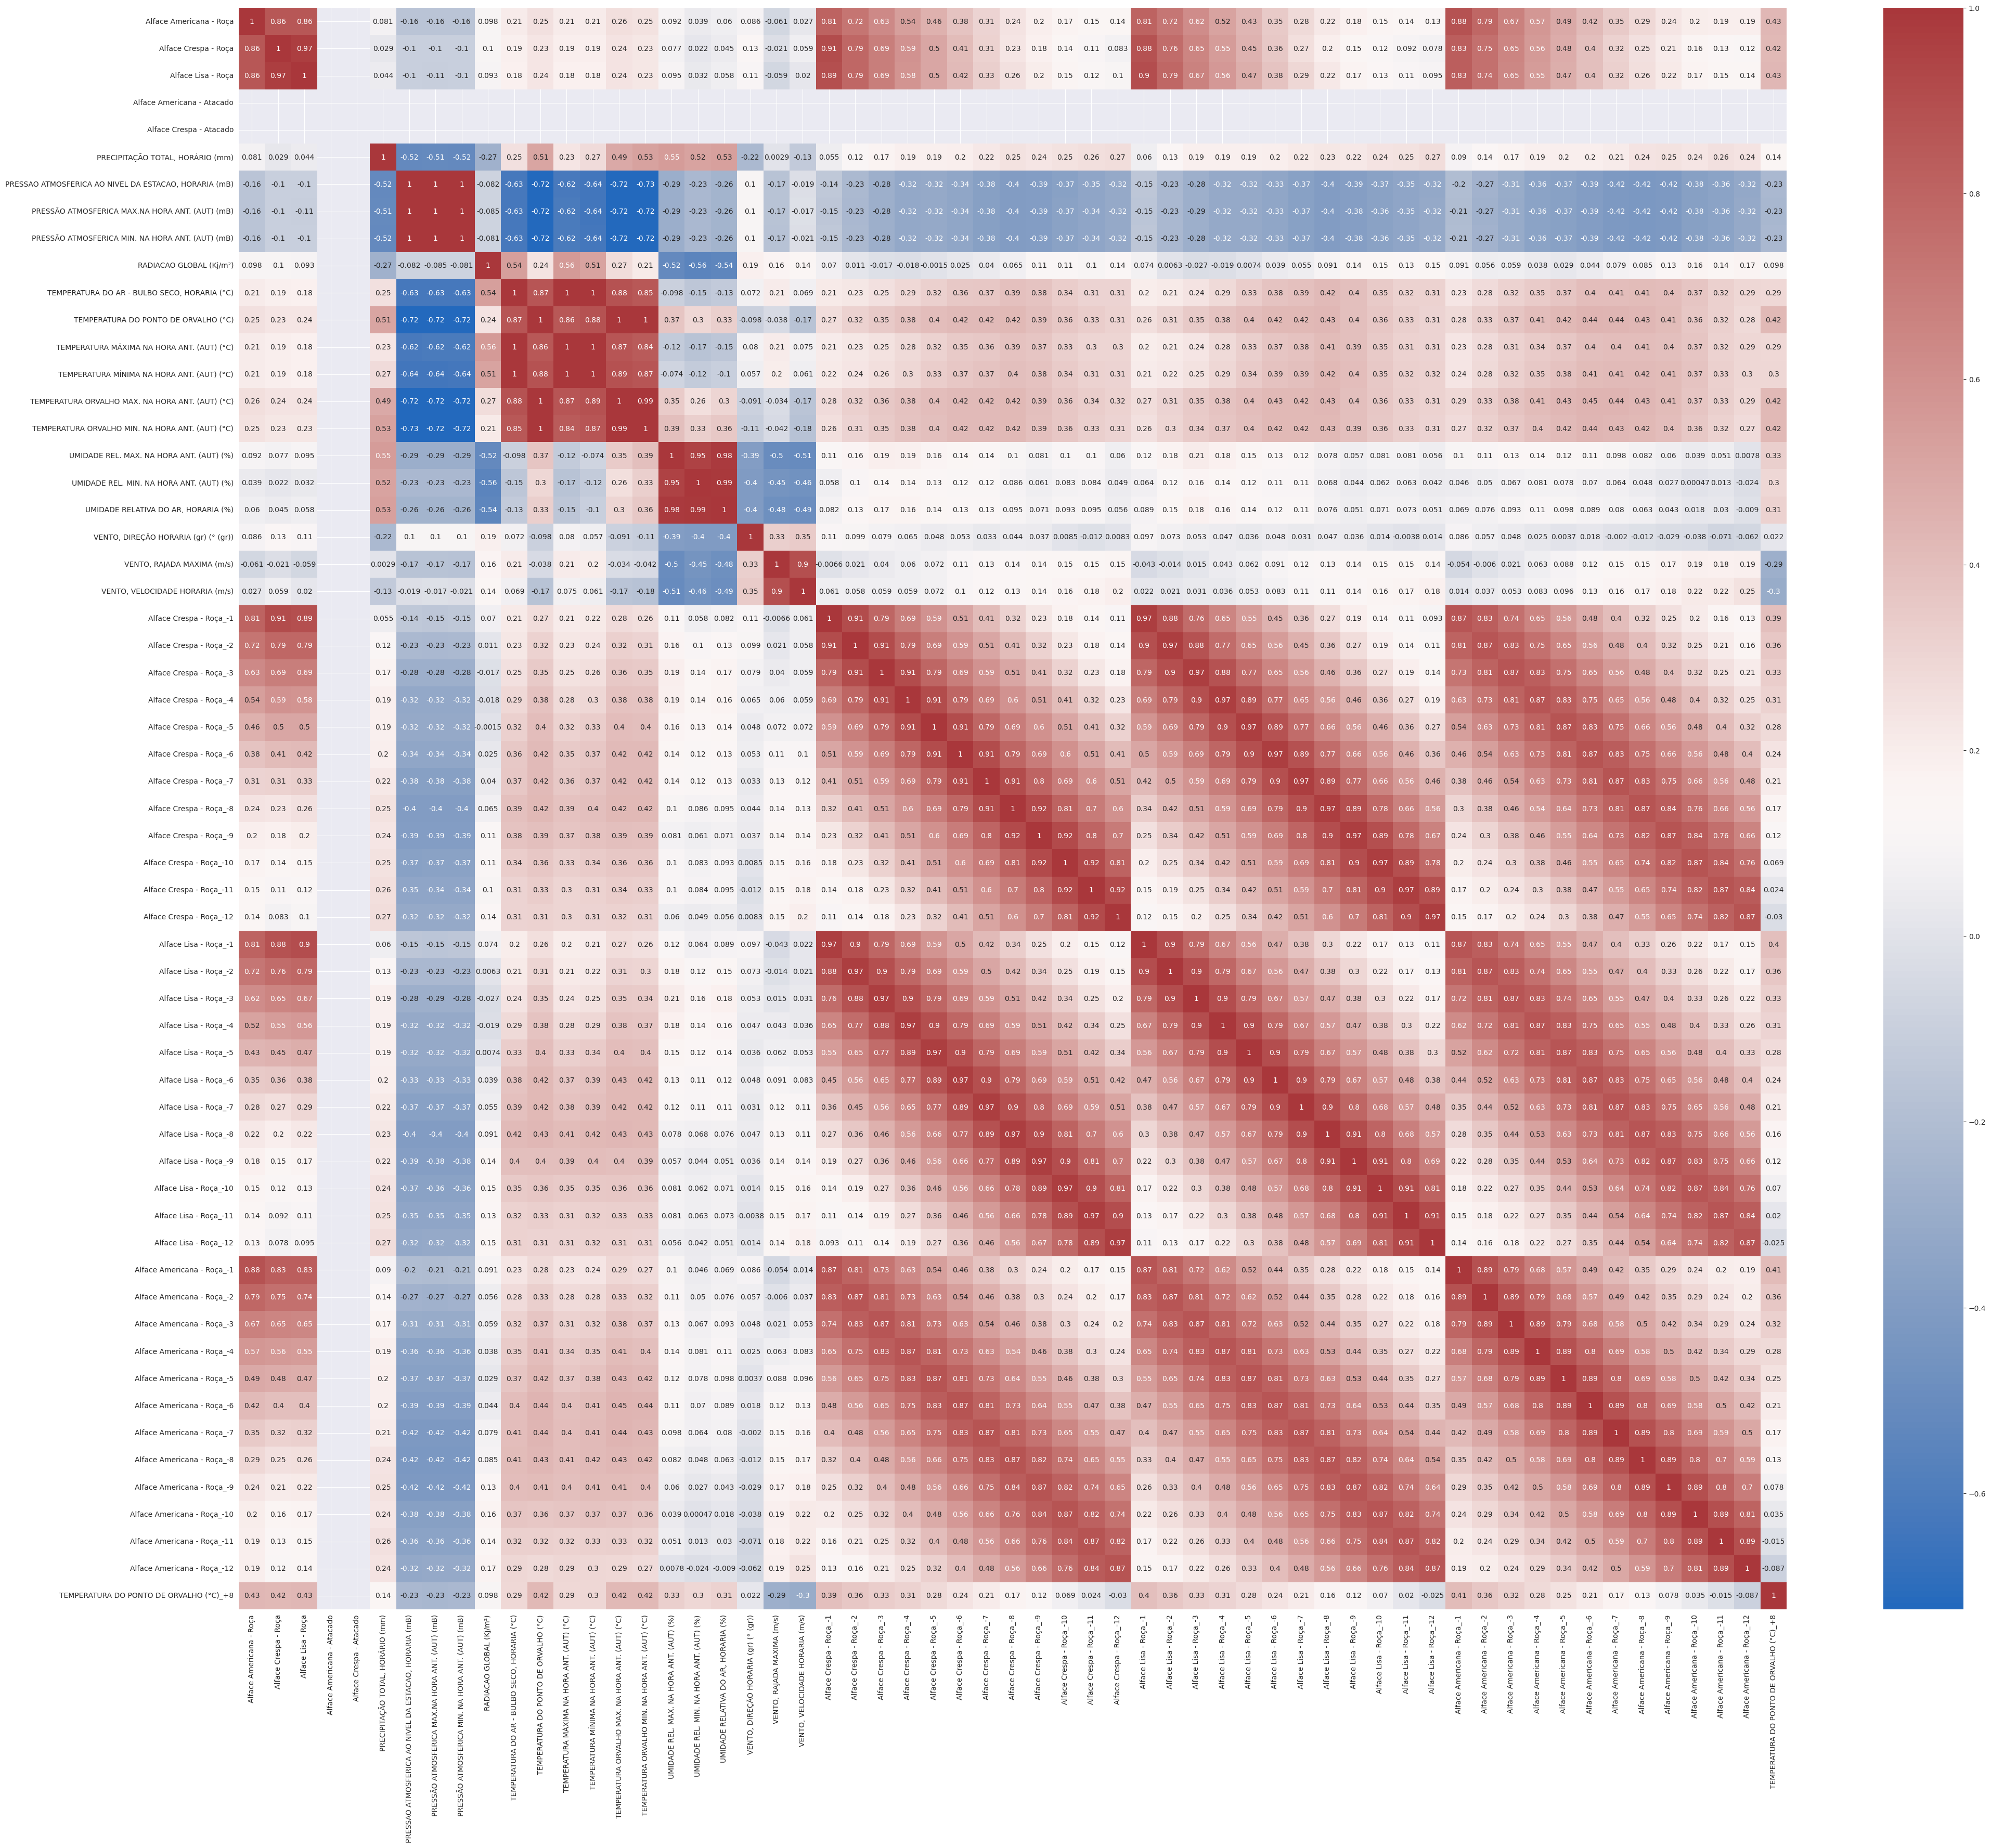

In [19]:
plt.figure(figsize=(48, 40))
sns.heatmap(cor,  cmap=sns.color_palette("vlag", as_cmap=True), annot=True)
#plt.show()
plt.savefig('correlation.png')

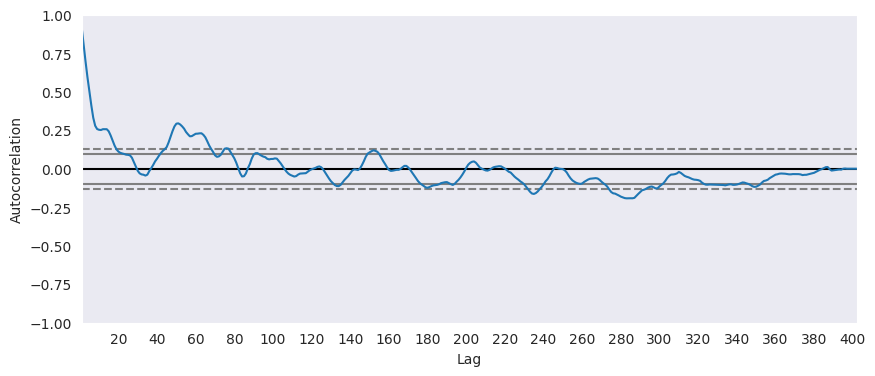

In [20]:
price_series = pd.Series(price_weather_df[['Alface Crespa - Roça']].values[:, 0])
plt.figure(figsize=(10, 4))
plt.xticks(range(0, len(price_series), 20),  rotation=0)
pd.plotting.autocorrelation_plot(price_series)
plt.show()

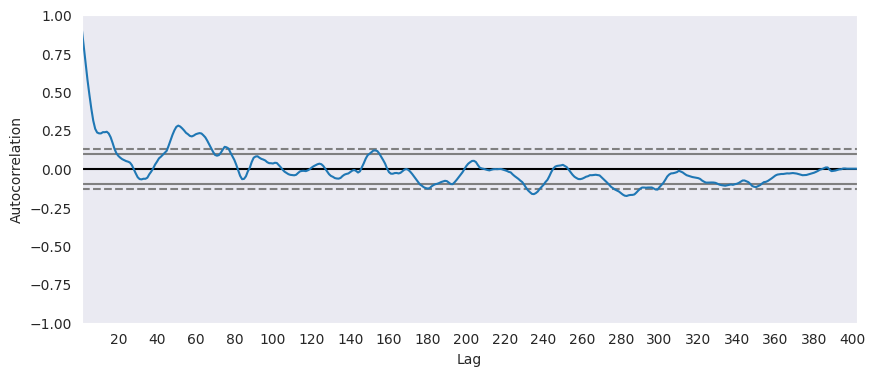

In [21]:
price_series = pd.Series(price_weather_df[['Alface Lisa - Roça']].values[:, 0])
plt.figure(figsize=(10, 4))
plt.xticks(range(0, len(price_series), 20),  rotation=0)
pd.plotting.autocorrelation_plot(price_series)
plt.show()

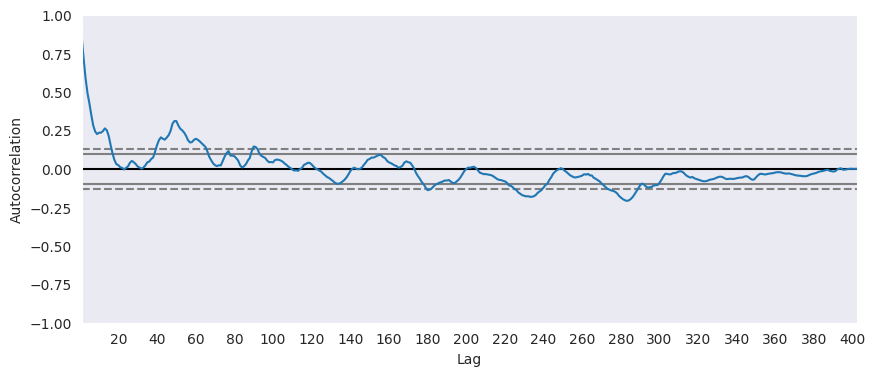

In [22]:
price_series = pd.Series(price_weather_df[['Alface Americana - Roça']].values[:, 0])
plt.figure(figsize=(10, 4))
plt.xticks(range(0, len(price_series), 20),  rotation=0)
pd.plotting.autocorrelation_plot(price_series)
plt.show()

In [23]:
adftest = adfuller(price_weather_df[['Alface Americana - Roça']], autolag = 'AIC', regression = 'ct')
print("ADF Test Results")
print("Null Hypothesis: The series has an Unit Root")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null Hypothesis and the series is Stationary")


ADF Test Results
Null Hypothesis: The series has an Unit Root
ADF-Statistic: -4.955342826900478
P-Value: 0.0002479286829730356
Number of lags: 15
Number of observations: 386
Critical Values {'1%': -3.98241675663651, '5%': -3.421925528129767, '10%': -3.1337751777180234}
Note: If P-Value is smaller than 0.05, we reject the null Hypothesis and the series is Stationary
